In [1]:
import numpy as np
import numpy.matlib
from numpy import exp, abs, sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import tensorflow as tf
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
from itertools import product

tf.keras.backend.set_floatx('float64');

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

### DATA

In [2]:
# Size of the data
train_size = 40000; # Size of the training set
test_size = 4000; # Size of the test set
calibration_size = test_size;
param_in = 7; # Input size to the neural network

K_vector = np.array([31.6, 31.8, 32.0, 32.2, 32.4, 32.6, 32.8, 33.0, 33.2])
tau_vector = np.array([1/12, 2/12, 3/12, 4/12, 5/12, 6/12, 1]) 

N1 = len(K_vector)
N2 = len(tau_vector) 

params_range = np.loadtxt('params_gridbased_with_NS.dat')
price = np.reshape(np.loadtxt('price_gridbased_with_NS.dat'), newshape = (train_size+test_size, N1, N2), order ='F')

In [3]:
# Train and test sets
params_range_train = params_range[np.arange(train_size), :] # size=[train_size, param_in]
params_range_test = params_range[train_size + np.arange(test_size), :] # size=[test_size, param_in]

price_train = price[np.arange(train_size), :, :] # size=[train_size, N1, N2]
price_test = price[train_size + np.arange(test_size), :, :] # size=[test_size, N1, N2]

# Calibration set
price_cal = price_test
params_cal = params_range_test

## FIRST STEP

In [4]:
# Define the neural network. There are many possibilites here.
print('Initializing model')

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(30, activation='relu');
        self.dense2 = tf.keras.layers.Dense(30, activation='relu');
        self.dense3 = tf.keras.layers.Dense(30, activation='relu')
        self.dense4 = tf.keras.layers.Dense(N1*N2, activation = None)
        self.reshape = tf.keras.layers.Reshape([N1,N2]);
        
    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        x = self.reshape(x)
        return x

# Create an instance of the model
model = MyModel()

# Choose optimizer and type of loss function
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.MeanSquaredError();

model.compile(loss = loss_object,
              optimizer = optimizer)
model.build(input_shape=(1,param_in))
model.summary()

model(tf.ones(shape = (1,param_in)));

model.load_weights('opt_weight_gridbased_dense_with_NS.h5')

Initializing model
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  240       
_________________________________________________________________
dense_1 (Dense)              multiple                  930       
_________________________________________________________________
dense_2 (Dense)              multiple                  930       
_________________________________________________________________
dense_3 (Dense)              multiple                  1953      
_________________________________________________________________
reshape (Reshape)            multiple                  0         
Total params: 4,053
Trainable params: 4,053
Non-trainable params: 0
_________________________________________________________________

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this wa

### Training (if the weights are not loaded)

Compiling train step
Compiling test step


Starting to train
Epoch 1/200, Loss: 0.1282154253,  Test Loss: 0.0200595096, Delta Test Loss: 0.0200595096
Epoch 2/200, Loss: 0.0201390263,  Test Loss: 0.0211820881, Delta Test Loss: 0.0011225785
Epoch 3/200, Loss: 0.0193867130,  Test Loss: 0.0231169063, Delta Test Loss: 0.0019348183
Epoch 4/200, Loss: 0.0185318603,  Test Loss: 0.0172972769, Delta Test Loss: 0.0058196294
Epoch 5/200, Loss: 0.0178670019,  Test Loss: 0.0219661109, Delta Test Loss: 0.0046688341
Epoch 6/200, Loss: 0.0166064447,  Test Loss: 0.0145122234, Delta Test Loss: 0.0074538876
Epoch 7/200, Loss: 0.0139871389,  Test Loss: 0.0091699611, Delta Test Loss: 0.0053422623
Epoch 8/200, Loss: 0.0090337480,  Test Loss: 0.0069518361, Delta Test Loss: 0.0022181250
Epoch 9/200, Loss: 0.0024855821,  Test Loss: 0.0001694049, Delta Test Loss: 0.0067824312
Epoch 10/200, Loss: 0.0011361233,  Test Loss: 0.0006491880, Delta Test Loss: 0.0004797831
Epoch 11/200, Loss: 0.0010132541,  Test Loss: 0.

Epoch 29/200, Loss: 0.0006236645,  Test Loss: 0.0007994529, Delta Test Loss: 0.0005718975
Epoch 30/200, Loss: 0.0006476552,  Test Loss: 0.0001151052, Delta Test Loss: 0.0006843477
Epoch 31/200, Loss: 0.0006528182,  Test Loss: 0.0000656818, Delta Test Loss: 0.0000494234
Epoch 32/200, Loss: 0.0005948397,  Test Loss: 0.0007676402, Delta Test Loss: 0.0007019583
Epoch 33/200, Loss: 0.0005931506,  Test Loss: 0.0003658517, Delta Test Loss: 0.0004017885
Epoch 34/200, Loss: 0.0005906851,  Test Loss: 0.0003671480, Delta Test Loss: 0.0000012964
Epoch 35/200, Loss: 0.0006171707,  Test Loss: 0.0002785137, Delta Test Loss: 0.0000886343
Epoch 36/200, Loss: 0.0005794933,  Test Loss: 0.0001100188, Delta Test Loss: 0.0001684949
Epoch 37/200, Loss: 0.0005572820,  Test Loss: 0.0000406906, Delta Test Loss: 0.0000693282
Epoch 38/200, Loss: 0.0005660612,  Test Loss: 0.0023166696, Delta Test Loss: 0.0022759790
Epoch 39/200, Loss: 0.0005789240,  Test Loss: 0.0016772657, Delta Test Loss: 0.0006394039
Epoch 40/2

Epoch 120/200, Loss: 0.0003224428,  Test Loss: 0.0007419395, Delta Test Loss: 0.0004525476
Epoch 121/200, Loss: 0.0002919419,  Test Loss: 0.0001977414, Delta Test Loss: 0.0005441981
Epoch 122/200, Loss: 0.0003237574,  Test Loss: 0.0000092510, Delta Test Loss: 0.0001884904
Epoch 123/200, Loss: 0.0003064892,  Test Loss: 0.0000100523, Delta Test Loss: 0.0000008013
Epoch 124/200, Loss: 0.0003039891,  Test Loss: 0.0002830930, Delta Test Loss: 0.0002730406
Epoch 125/200, Loss: 0.0003121420,  Test Loss: 0.0008341432, Delta Test Loss: 0.0005510502
Epoch 126/200, Loss: 0.0003071125,  Test Loss: 0.0002397473, Delta Test Loss: 0.0005943959
Epoch 127/200, Loss: 0.0003027647,  Test Loss: 0.0000146265, Delta Test Loss: 0.0002251208
Epoch 128/200, Loss: 0.0003364166,  Test Loss: 0.0000070596, Delta Test Loss: 0.0000075669
Epoch 129/200, Loss: 0.0002836153,  Test Loss: 0.0000064053, Delta Test Loss: 0.0000006542
Epoch 130/200, Loss: 0.0003131211,  Test Loss: 0.0000236701, Delta Test Loss: 0.0000172648

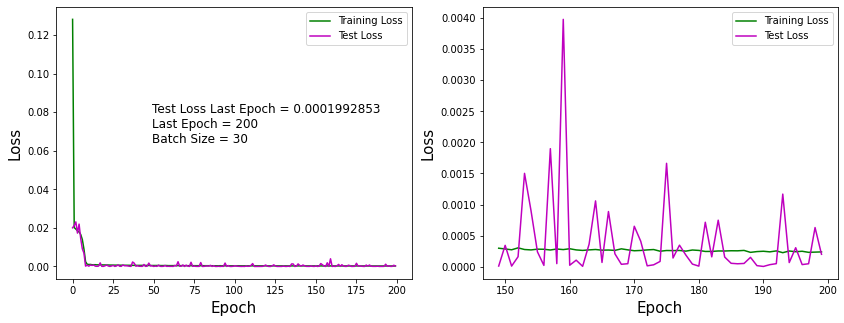

In [91]:
EPOCHS = 200         # Number of steps training
batch_size = 30;

patience = 20
delta = 0.0002

# Choose what type of information you want to print
train_loss = tf.keras.metrics.Mean(name='train_mean')
test_loss = tf.keras.metrics.Mean(name='test_mean')

# To speed up training we need to create a some object which can send the data 
# fast to the GPU. Notice that they depend on the bactch_size
train_ds = tf.data.Dataset.from_tensor_slices(
              (params_range_train, price_train)).shuffle(10000).batch(batch_size)

test_ds = tf.data.Dataset.from_tensor_slices((params_range_test, price_test)).batch(batch_size)  

# Define the early stop function
def early_stop(loss_vec):
    delta_loss = np.abs(np.diff(loss_vec))
    delta_loss = delta_loss[-patience:]
    return (np.prod(delta_loss < delta))
    
# Next we compile a few low level functions which will compute the actual gradient.
print('Compiling train step')
@tf.function
def train_step(input_param, prices):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(input_param, training=True)
        loss = loss_object(prices, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)

print('Compiling test step')
@tf.function
def test_step(input_param, prices):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(input_param, training=False)
    t_loss = loss_object(prices, predictions)

    test_loss(t_loss)
    
# Vectors of loss
test_loss_vec = np.array([0.0])
train_loss_vec = np.array([0.0])

# We start to train the network.
print('\n\nStarting to train')
for epoch in range(EPOCHS):
    
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    test_loss.reset_states()
  
    for input_param, prices in train_ds:
        # For each batch of images, and prices, compute the gradient and update 
        # the gradient of the network
        train_step(input_param, prices)

    for test_images, test_prices in test_ds:
        # For each of the test data, compute how the network performs on the data
        # We do not compute any gradients here
        test_step(test_images, test_prices)

    # Print some usfull information
    template = 'Epoch {0}/{1}, Loss: {2:.10f},  Test Loss: {3:.10f}, Delta Test Loss: {4:.10f}'
    print(template.format(epoch+1,
                          EPOCHS,
                          train_loss.result().numpy(),
                          test_loss.result().numpy(),
                          np.abs(test_loss.result()-test_loss_vec[-1])
                          ))
    
    train_loss_vec = np.append(train_loss_vec, train_loss.result())
    test_loss_vec = np.append(test_loss_vec, test_loss.result())
    
    if (epoch > patience):
        if early_stop(test_loss_vec):
            print('Early stopping at epoch = ', epoch+1)
            break

model.save_weights('opt_weight_gridbased_dense_with_NS.h5')          
          
l2 = plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(np.arange(epoch+1), train_loss_vec[1:], '-g')
plt.plot(np.arange(epoch+1), test_loss_vec[1:], '-m')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel("Epoch", fontsize=15, labelpad=5);
plt.ylabel("Loss", fontsize=15, labelpad=5);
text = 'Test Loss Last Epoch = %.10f' %test_loss.result().numpy() + '\n'+ 'Last Epoch = %d' %(epoch+1)  + '\n'+ 'Batch Size = %d' %batch_size 
plt.text(epoch//4, train_loss_vec[1]/2, text , fontsize=12);

plt.subplot(1,2,2)
plt.plot(np.arange(epoch-50, epoch+1), train_loss_vec[(epoch-50+1):], '-g')
plt.plot(np.arange(epoch-50, epoch+1), test_loss_vec[(epoch-50+1):], '-m')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel("Epoch", fontsize=15, labelpad=5);
plt.ylabel("Loss", fontsize=15, labelpad=5);

#l2.savefig('loss_step1_gridbased_dense_with_NS.pdf')

In [8]:
price_predicted_train = model(params_range_train).numpy()
price_predicted_test = model(params_range_test).numpy()

err_training_train = abs(price_predicted_train-price_train)/price_train
err_training_test = abs(price_predicted_test-price_test)/price_test

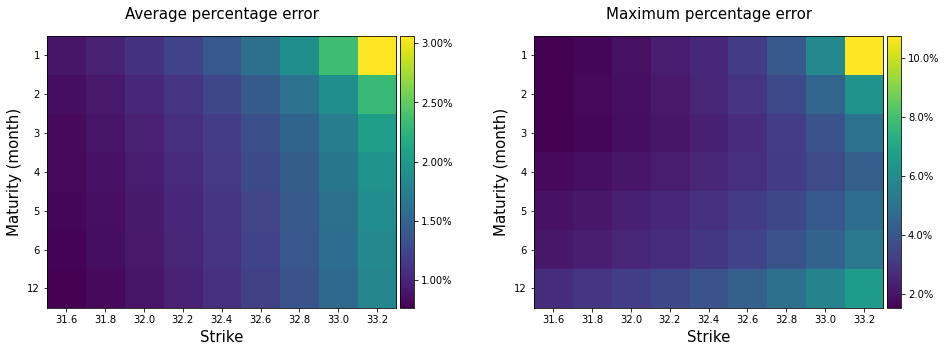

In [9]:
K_label = np.array([31.6, 31.8, 32.0, 32.2, 32.4, 32.6, 32.8, 33.0, 33.2])
tau_label = ['1', '2', '3', '4', '5', '6', '12']

f = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
mean_err = np.mean(100*err_training_train,axis = 0)
plt.title("Average percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(mean_err))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);

ax = plt.subplot(1,2,2)
max_err = np.max(100*err_training_train,axis = 0)
plt.title("Maximum percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(max_err))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);

#f.savefig('error_step1_train_gridbased_dense_with_NS.pdf', bbox_inches = 'tight', pad_inches = 0.01)

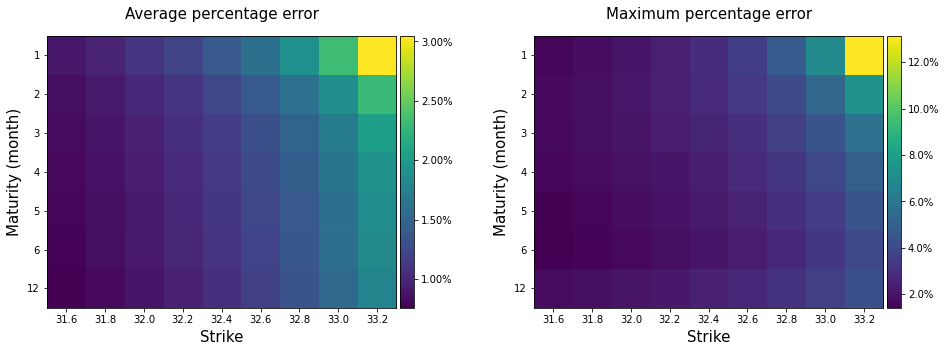

In [7]:
K_label = np.array([31.6, 31.8, 32.0, 32.2, 32.4, 32.6, 32.8, 33.0, 33.2])
tau_label = ['1', '2', '3', '4', '5', '6', '12']

f = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
mean_err = np.mean(100*err_training_test,axis = 0)
plt.title("Average percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(mean_err))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);

ax = plt.subplot(1,2,2)
max_err = np.max(100*err_training_test,axis = 0)
plt.title("Maximum percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(max_err))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);

#f.savefig('error_step1_test_gridbased_dense_with_NS.pdf', bbox_inches = 'tight', pad_inches = 0.01)

## SECOND STEP

In [15]:
# The network is done training. We are ready to start on the Calibration step
print('\n\nCalibration step')

EPOCHS_CAL = 1000     # Number of steps calebrating

# Choose optimizer and type of loss function
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.MeanSquaredError();
calibration_loss = tf.keras.metrics.Mean(name='calibration_mean')

# This does depend on the calibration size
cal_ds = tf.data.Dataset.from_tensor_slices(
              (price_cal)).batch(calibration_size)

print('Compiling calibration step')
@tf.function
def calibration_step(input_guess, prices):
        
        with tf.GradientTape() as tape:
            tape.watch(input_guess)
            prediction = model(input_guess)
            c_loss = loss_object(prices, prediction)
        calibration_loss(c_loss)
        grads = tape.gradient(c_loss, [input_guess])
        optimizer.apply_gradients(zip(grads, [input_guess]))

# We need to guess some initial model parameters.
input_guess = params_cal + np.random.rand(calibration_size, param_in)*np.array([0.05, 0.05, 0.5, 0.5, 0.05, 0.05, 0.05])

# I just copy the starting parameters for convenience. This is not necessary
old_input_guess = input_guess.copy();

# Important: First convert to tensor, then to variable
tf_input_guess = tf.convert_to_tensor(input_guess)
tf_var_input_guess = tf.Variable(tf_input_guess);

# Start the actual calibration
for epoch in range(EPOCHS_CAL):
    calibration_loss.reset_states()
    for labels in cal_ds:
        # For each set of labels, compute the gradient of the network, and 
        # preform a gradient update on the input parameters. 
        calibration_step(tf_var_input_guess, labels)

    template = 'Epoch_cal {}, Loss: {}'
    print(template.format(epoch+1,
                          calibration_loss.result(),
                          ))

new_input_guess = tf_var_input_guess.numpy();

X = new_input_guess-old_input_guess
print(np.linalg.norm(X, 'fro'));



Calibration step
Compiling calibration step
Epoch_cal 1, Loss: 0.02895251475274563
Epoch_cal 2, Loss: 0.028565973043441772
Epoch_cal 3, Loss: 0.028174305334687233
Epoch_cal 4, Loss: 0.027782415971159935
Epoch_cal 5, Loss: 0.0273920688778162
Epoch_cal 6, Loss: 0.027004171162843704
Epoch_cal 7, Loss: 0.02661926858127117
Epoch_cal 8, Loss: 0.026237742975354195
Epoch_cal 9, Loss: 0.025859840214252472
Epoch_cal 10, Loss: 0.025485768914222717
Epoch_cal 11, Loss: 0.02511567808687687
Epoch_cal 12, Loss: 0.024749688804149628
Epoch_cal 13, Loss: 0.024387890473008156
Epoch_cal 14, Loss: 0.024030355736613274
Epoch_cal 15, Loss: 0.023677142336964607
Epoch_cal 16, Loss: 0.02332829125225544
Epoch_cal 17, Loss: 0.022983841598033905
Epoch_cal 18, Loss: 0.022643812000751495
Epoch_cal 19, Loss: 0.022308213636279106
Epoch_cal 20, Loss: 0.021977057680487633
Epoch_cal 21, Loss: 0.021650342270731926
Epoch_cal 22, Loss: 0.021328069269657135
Epoch_cal 23, Loss: 0.021010223776102066
Epoch_cal 24, Loss: 0.0206

Epoch_cal 139, Loss: 0.0038850284181535244
Epoch_cal 140, Loss: 0.00383300194516778
Epoch_cal 141, Loss: 0.00378177547827363
Epoch_cal 142, Loss: 0.0037313371431082487
Epoch_cal 143, Loss: 0.003681675298139453
Epoch_cal 144, Loss: 0.0036327773705124855
Epoch_cal 145, Loss: 0.0035846312530338764
Epoch_cal 146, Loss: 0.003537226002663374
Epoch_cal 147, Loss: 0.0034905497450381517
Epoch_cal 148, Loss: 0.0034445906057953835
Epoch_cal 149, Loss: 0.003399337874725461
Epoch_cal 150, Loss: 0.003354780375957489
Epoch_cal 151, Loss: 0.0033109080977737904
Epoch_cal 152, Loss: 0.0032677091658115387
Epoch_cal 153, Loss: 0.003225173568353057
Epoch_cal 154, Loss: 0.0031832910608500242
Epoch_cal 155, Loss: 0.003142051864415407
Epoch_cal 156, Loss: 0.003101445036008954
Epoch_cal 157, Loss: 0.0030614619608968496
Epoch_cal 158, Loss: 0.003022091696038842
Epoch_cal 159, Loss: 0.0029833251610398293
Epoch_cal 160, Loss: 0.002945153508335352
Epoch_cal 161, Loss: 0.002907566027715802
Epoch_cal 162, Loss: 0.00

Epoch_cal 335, Loss: 0.0005944200092926621
Epoch_cal 336, Loss: 0.0005911492044106126
Epoch_cal 337, Loss: 0.0005879142554476857
Epoch_cal 338, Loss: 0.0005847148131579161
Epoch_cal 339, Loss: 0.0005815501790493727
Epoch_cal 340, Loss: 0.0005784198874607682
Epoch_cal 341, Loss: 0.0005753234145231545
Epoch_cal 342, Loss: 0.0005722602363675833
Epoch_cal 343, Loss: 0.0005692298873327672
Epoch_cal 344, Loss: 0.0005662319017574191
Epoch_cal 345, Loss: 0.0005632657557725906
Epoch_cal 346, Loss: 0.0005603308090940118
Epoch_cal 347, Loss: 0.0005574268870986998
Epoch_cal 348, Loss: 0.0005545533495023847
Epoch_cal 349, Loss: 0.000551709730643779
Epoch_cal 350, Loss: 0.0005488957394845784
Epoch_cal 351, Loss: 0.0005461107357405126
Epoch_cal 352, Loss: 0.0005433542537502944
Epoch_cal 353, Loss: 0.0005406261770986021
Epoch_cal 354, Loss: 0.0005379258072935045
Epoch_cal 355, Loss: 0.0005352528532966971
Epoch_cal 356, Loss: 0.0005326067330315709
Epoch_cal 357, Loss: 0.000529987330082804
Epoch_cal 358

Epoch_cal 528, Loss: 0.0002848697768058628
Epoch_cal 529, Loss: 0.00028404148179106414
Epoch_cal 530, Loss: 0.00028321691206656396
Epoch_cal 531, Loss: 0.0002823959512170404
Epoch_cal 532, Loss: 0.0002815786865539849
Epoch_cal 533, Loss: 0.0002807650016620755
Epoch_cal 534, Loss: 0.00027995489654131234
Epoch_cal 535, Loss: 0.00027914842939935625
Epoch_cal 536, Loss: 0.0002783454256132245
Epoch_cal 537, Loss: 0.00027754594339057803
Epoch_cal 538, Loss: 0.0002767499245237559
Epoch_cal 539, Loss: 0.0002759573399089277
Epoch_cal 540, Loss: 0.0002751682186499238
Epoch_cal 541, Loss: 0.0002743824734352529
Epoch_cal 542, Loss: 0.00027360013336874545
Epoch_cal 543, Loss: 0.00027282111113891006
Epoch_cal 544, Loss: 0.0002720454358495772
Epoch_cal 545, Loss: 0.0002712730201892555
Epoch_cal 546, Loss: 0.0002705039514694363
Epoch_cal 547, Loss: 0.0002697381132747978
Epoch_cal 548, Loss: 0.0002689755638130009
Epoch_cal 549, Loss: 0.00026821615756489336
Epoch_cal 550, Loss: 0.0002674599818419665
Epo

Epoch_cal 717, Loss: 0.00017437685164622962
Epoch_cal 718, Loss: 0.00017396923794876784
Epoch_cal 719, Loss: 0.00017356296302750707
Epoch_cal 720, Loss: 0.00017315805598627776
Epoch_cal 721, Loss: 0.00017275444406550378
Epoch_cal 722, Loss: 0.0001723522145766765
Epoch_cal 723, Loss: 0.00017195129476021975
Epoch_cal 724, Loss: 0.0001715516991680488
Epoch_cal 725, Loss: 0.00017115344235207886
Epoch_cal 726, Loss: 0.00017075648065656424
Epoch_cal 727, Loss: 0.0001703608431853354
Epoch_cal 728, Loss: 0.0001699665153864771
Epoch_cal 729, Loss: 0.00016957346815615892
Epoch_cal 730, Loss: 0.00016918171604629606
Epoch_cal 731, Loss: 0.00016879128816071898
Epoch_cal 732, Loss: 0.000168402140843682
Epoch_cal 733, Loss: 0.00016801424499135464
Epoch_cal 734, Loss: 0.00016762765881139785
Epoch_cal 735, Loss: 0.00016724229499232024
Epoch_cal 736, Loss: 0.00016685822629369795
Epoch_cal 737, Loss: 0.0001664754090597853
Epoch_cal 738, Loss: 0.00016609385784249753
Epoch_cal 739, Loss: 0.0001657135289860

Epoch_cal 906, Loss: 0.00011633181566139683
Epoch_cal 907, Loss: 0.00011610400542849675
Epoch_cal 908, Loss: 0.00011587682092795148
Epoch_cal 909, Loss: 0.00011565025488380343
Epoch_cal 910, Loss: 0.00011542436550371349
Epoch_cal 911, Loss: 0.0001151991164078936
Epoch_cal 912, Loss: 0.00011497450032038614
Epoch_cal 913, Loss: 0.00011475050268927589
Epoch_cal 914, Loss: 0.00011452713079052046
Epoch_cal 915, Loss: 0.00011430438462411985
Epoch_cal 916, Loss: 0.0001140822860179469
Epoch_cal 917, Loss: 0.00011386079131625593
Epoch_cal 918, Loss: 0.00011363992234691978
Epoch_cal 919, Loss: 0.00011341966455802321
Epoch_cal 920, Loss: 0.00011320002522552386
Epoch_cal 921, Loss: 0.00011298101162537932
Epoch_cal 922, Loss: 0.00011276260920567438
Epoch_cal 923, Loss: 0.00011254478886257857
Epoch_cal 924, Loss: 0.0001123276015277952
Epoch_cal 925, Loss: 0.00011211101082153618
Epoch_cal 926, Loss: 0.0001118950021918863
Epoch_cal 927, Loss: 0.00011167963384650648
Epoch_cal 928, Loss: 0.0001114648475

In [10]:
#np.savetxt('params_calibrated_adam_with_NS.dat', new_input_guess)
new_input_guess = np.loadtxt('params_calibrated_adam_with_NS.dat')

In [11]:
# Errors and plots
percentage_err = np.abs(new_input_guess-params_cal)/np.abs(params_cal)
mean_percentage_err = np.mean(percentage_err, axis = 0)*100
percentage_err_copy = percentage_err.copy()
percentage_err_copy.sort(axis=0)
median_percentage_err = percentage_err_copy[calibration_size//2, :]*100

In [12]:
mean_percentage_err

array([32.36919591, 20.68152969,  3.94482638,  0.11520923,  4.28844337,
       22.27746412,  1.34370608])

In [13]:
median_percentage_err

array([24.55809501, 17.86857589,  3.24480448,  0.06780084,  1.9103854 ,
       17.19644286,  0.86476911])

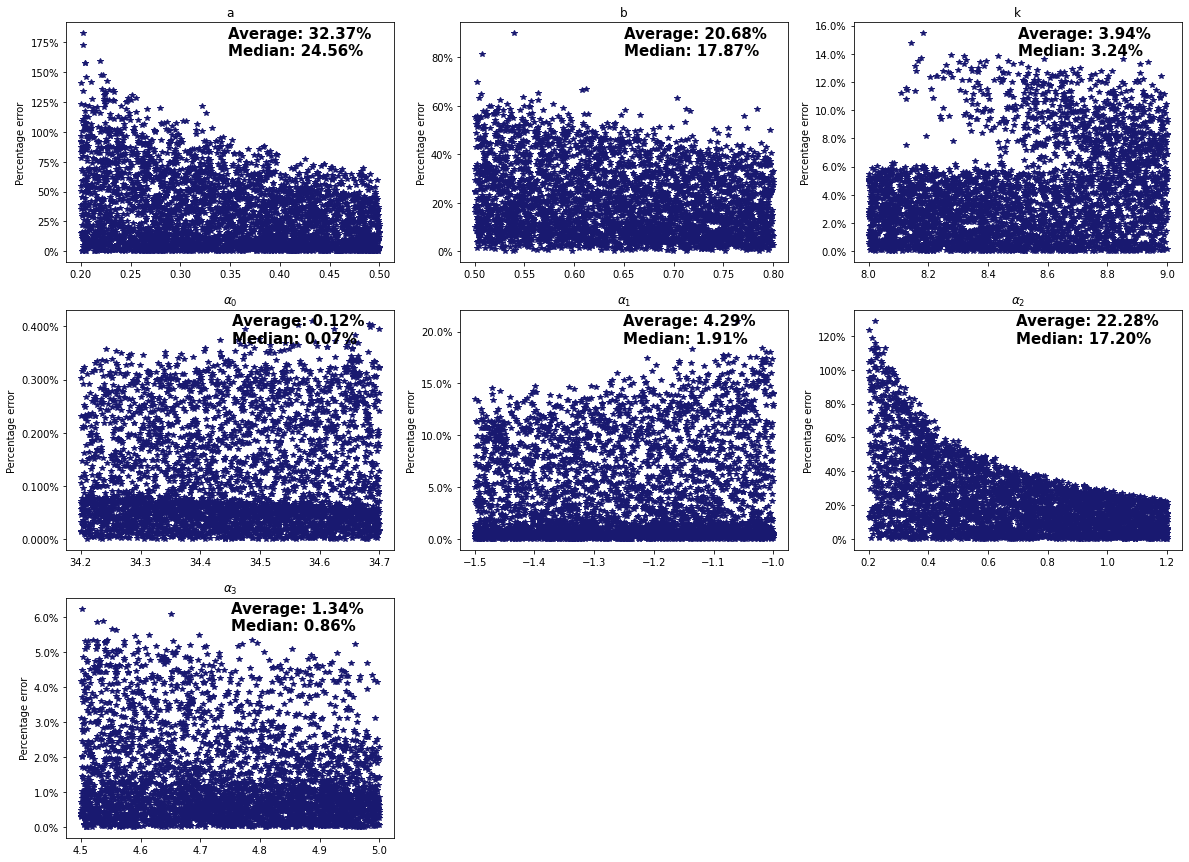

In [14]:
f = plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.plot(params_cal[:,0], percentage_err[:,0]*100, '*', color = 'midnightblue')
plt.title('a')
plt.ylabel('Percentage error');
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
s0 = 'Average: %.2f' %mean_percentage_err[0] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[0] + r'%'
plt.text(np.mean(params_cal[:,0]), np.max(percentage_err[:,0]*90), s0, fontsize=15, weight = 'bold')

plt.subplot(3,3,2)
plt.plot(params_cal[:,1], percentage_err[:,1]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('b')
plt.ylabel('Percentage error');
s1 = 'Average: %.2f' %mean_percentage_err[1] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[1] + r'%'
plt.text(np.mean(params_cal[:,1]), np.max(percentage_err[:,1]*90), s1, fontsize=15, weight = 'bold')

plt.subplot(3,3,3)
plt.plot(params_cal[:,2], percentage_err[:,2]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('k')
plt.ylabel('Percentage error');
s2 = 'Average: %.2f' %mean_percentage_err[2] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[2] + r'%'
plt.text(np.mean(params_cal[:,2]), np.max(percentage_err[:,2]*90), s2, fontsize=15, weight = 'bold')

plt.subplot(3,3,4)
plt.plot(params_cal[:,3], percentage_err[:,3]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('$\\alpha_0$')
plt.ylabel('Percentage error');
s2 = 'Average: %.2f' %mean_percentage_err[3] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[3] + r'%'
plt.text(np.mean(params_cal[:,3]), np.max(percentage_err[:,3]*90), s2, fontsize=15, weight = 'bold')

plt.subplot(3,3,5)
plt.plot(params_cal[:,4], percentage_err[:,4]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('$\\alpha_1$')
plt.ylabel('Percentage error');
s2 = 'Average: %.2f' %mean_percentage_err[4] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[4] + r'%'
plt.text(np.mean(params_cal[:,4]), np.max(percentage_err[:,4]*90), s2, fontsize=15, weight = 'bold')

plt.subplot(3,3,6)
plt.plot(params_cal[:,5], percentage_err[:,5]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('$\\alpha_2$')
plt.ylabel('Percentage error');
s2 = 'Average: %.2f' %mean_percentage_err[5] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[5] + r'%'
plt.text(np.mean(params_cal[:,5]), np.max(percentage_err[:,5]*90), s2, fontsize=15, weight = 'bold')

plt.subplot(3,3,7)
plt.plot(params_cal[:,6], percentage_err[:,6]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('$\\alpha_3$')
plt.ylabel('Percentage error');
s2 = 'Average: %.2f' %mean_percentage_err[6] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[6] + r'%'
plt.text(np.mean(params_cal[:,6]), np.max(percentage_err[:,6]*90), s2, fontsize=15, weight = 'bold');

#f.savefig('cal_gridbased_dense_with_NS.pdf', bbox_inches = 'tight', pad_inches = 0.01)

In [15]:
price_predicted_cal = model(new_input_guess).numpy()
err_training_cal = abs(price_predicted_cal-price_cal)/price_cal

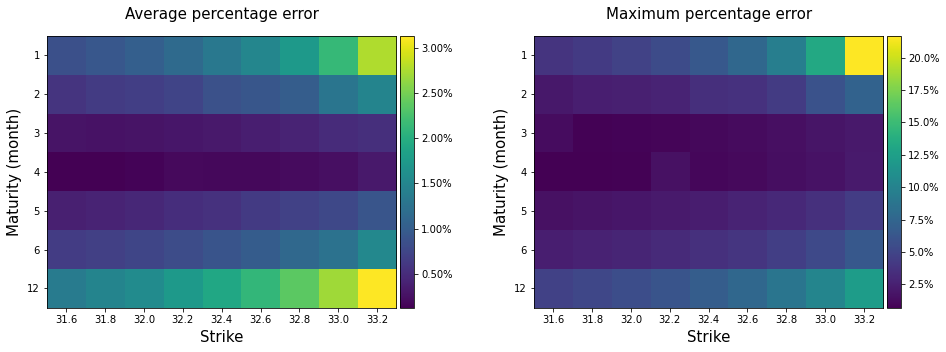

In [16]:
K_label = np.array([31.6, 31.8, 32.0, 32.2, 32.4, 32.6, 32.8, 33.0, 33.2])
tau_label = ['1', '2', '3', '4', '5', '6', '12']

f = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
mean_err = np.mean(100*err_training_cal,axis = 0)
plt.title("Average percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(mean_err))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);

ax = plt.subplot(1,2,2)
max_err = np.max(100*err_training_cal,axis = 0)
plt.title("Maximum percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(max_err))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);

#f.savefig('error_step2_gridbased_dense_with_NS.pdf', bbox_inches = 'tight', pad_inches = 0.01)